### TD_1:   First neural network for classifying images
---

Exe. 1

In [51]:
#run this only in GC 
try :
    %tensorflow_version 2.x
except Exception:
    pass

Exe. 2

In [52]:
#run this only on GC
from __future__ import absolute_import, division, print_function, unicode_literals

In [166]:
#cool library
import tensorflow as tf
from tensorflow import keras

#bboooooooo
import numpy as np
import matplotlib.pyplot as plt

Exe 3 

In [54]:
print(tf.__version__)

2.20.0


Exe 4 

In [55]:
data = keras.datasets.cifar10
cifar10_data = data.load_data()

Exe. 5 

In [56]:
print(f"lenght of cifar10_data :{len(cifar10_data)}\n")
print(f"shape of cifar10_data[0][0] :{cifar10_data[0][0].shape}\n")
print(f"shape of cifar10_data[0][1] :{cifar10_data[0][1].shape}\n")
print(f"type of cifar10_data :{type(cifar10_data)}\n")

lenght of cifar10_data :2

shape of cifar10_data[0][0] :(50000, 32, 32, 3)

shape of cifar10_data[0][1] :(50000, 1)

type of cifar10_data :<class 'tuple'>



50000 photos of 32x32x3 (3 for RGB) pixels

Exe. 6

In [ ]:
(train_images, train_labels) , (test_images, test_labels)= cifar10_data


#will be usefull for later 

def ft_cifar10_data(void):
    
    data = keras.datasets.cifar10_data
    cifar10_data = data.load_data()
    (train_images, train_labels) , (test_images, test_labels)= cifar10_data
    test_images = test_images.astype("float32") / 255.0
    train_images = train_images.astype("float32") / 255.0  
    return (train_images, train_labels) , (test_images, test_labels)

Exe 7

In [58]:
print(train_images[0][1][1])
print(train_images[0].shape)

class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

[0 0 0]
(32, 32, 3)


Exe 9

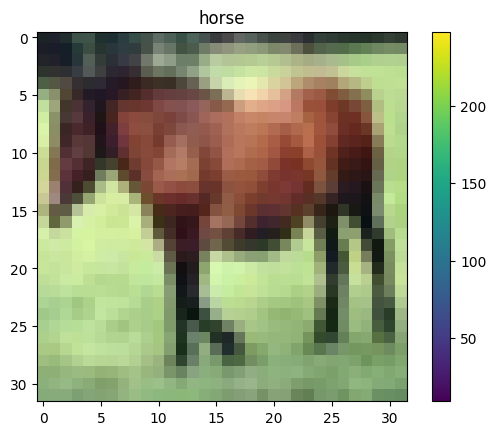

In [59]:
index = 7 
plt.figure()
plt.imshow(train_images[index])
plt.title(class_names[train_labels[index][0]])
plt.colorbar()
plt.grid(False)
plt.show()


Exe 10

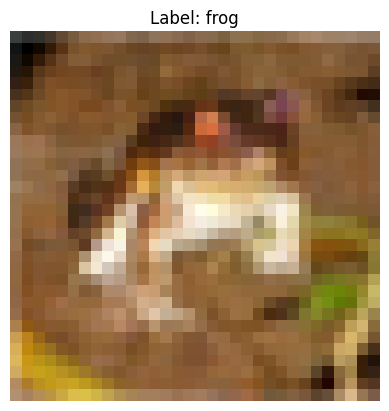

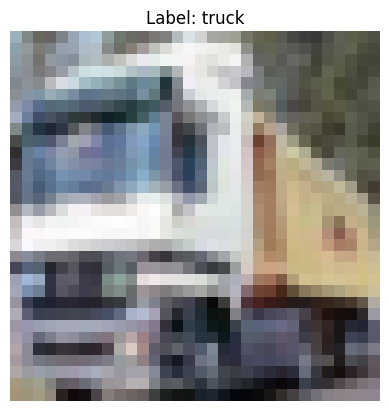

In [60]:
#utils 

def ft_showme(image, label=None,cmap=None):
    """
    image: numpy array (2D)
    cmap: 
    """
    plt.imshow(image)
    if label is not None:
        plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()
ft_showme(train_images[0], class_names[train_labels[0][0]],cmap='')
ft_showme(train_images[1],class_names[train_labels[1][0]],cmap='')


In [61]:
# plt.subplot()
# plt.xticks([])
# plt.yticks([])
# plt.imshow()
# plt.xlabel()

#what is this  ?? 

Exe 11 

Exe 12 

In [270]:

(train_images, train_labels) , (test_images, test_labels) = ft_cifar10_data()
data = ft_cifar10_data()
def create_model(data):
    shape =data[0][0].shape[1:]
    model = keras.Sequential([
        keras.Input(shape= shape),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model(data)
model.save("init.keras")

Exe 14

In [272]:
#let's compile it :P
model.fit(train_images, train_labels, epochs=5)
model.save("my_model.keras")   # ou .h5

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.4130 - loss: 1.6549
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.4224 - loss: 1.6273
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.4303 - loss: 1.6011
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.4361 - loss: 1.5807
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 974us/step - accuracy: 0.4424 - loss: 1.5667


Exe 15

In [274]:
model= tf.keras.models.load_model("init.keras")

# model.load_weights("init.weights.h5")
predictions = model.predict(test_images)

print(predictions[:5])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
[[0.05692749 0.08130499 0.06849737 0.06430248 0.12789634 0.28535607
  0.09219969 0.04384172 0.11147692 0.06819689]
 [0.03930809 0.12089562 0.07248452 0.04835408 0.1600986  0.16429594
  0.11540291 0.04985761 0.12533751 0.10396514]
 [0.0256819  0.07884333 0.07630348 0.04884546 0.12656356 0.21945879
  0.14415832 0.04360885 0.12816739 0.10836897]
 [0.04080026 0.06611032 0.05827093 0.03970306 0.17686425 0.24319425
  0.09251066 0.06492689 0.12228588 0.09533356]
 [0.08442758 0.08286123 0.08408667 0.06610425 0.11646891 0.2735993
  0.07462282 0.03978956 0.08540797 0.09263176]]


In [73]:
# DOn't execute (it will reset the weights)


Exe 16

In [ ]:
model= tf.keras.models.load_model("my_model.keras")


predictions = model.predict(test_images)

index = 15;
#print(predictions[:index])
pre = np.argmax(predictions, axis=1)
## NEED TO MODIFY THE FOLLOWING LINE !! (just kidding hhh)
print(f"\npredicted labels : {pre[:index]}\n")
print(f"probability of predicted labels :")
for i in range(index):
    print(f"{predictions[i][pre[i]]:.3f}", end="\t")
print(f"\n\nreal labels : {test_labels[:index].flatten()}\n")
print("\nProbability of real label")
for i in range(index):
    print(f"{predictions[i][test_labels[i][0]]:.3f}", end="\t")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step

predicted labels : [6 8 8 0 4 6 5 6 2 1 8 9 5 0 1]

probability of predicted labels :
0.318	0.613	0.436	0.368	0.808	0.484	0.341	0.615	0.376	0.594	0.458	0.842	0.274	0.444	0.472	

real labels : [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9]


Probability of real label
0.085	0.613	0.436	0.368	0.068	0.484	0.125	0.615	0.087	0.594	0.365	0.842	0.274	0.256	0.196	

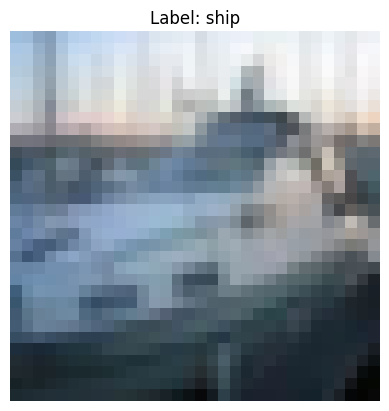

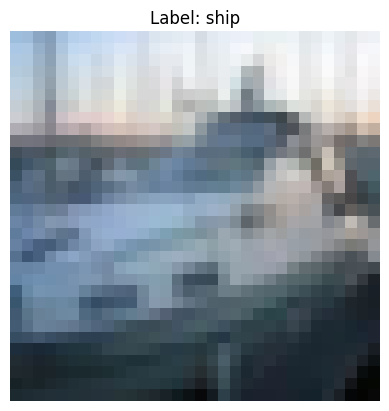

In [157]:
ft_showme(test_images[2], class_names[test_labels[2][0]],cmap='')
ft_showme(test_images[2], class_names[pre[2]],cmap='')


73
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step


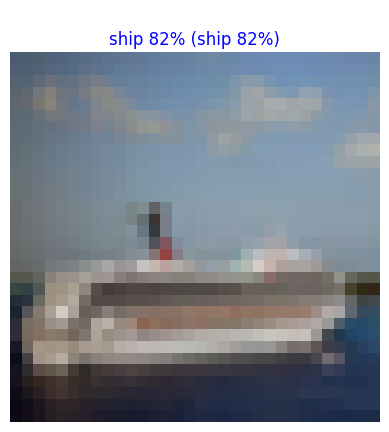

In [252]:
import random
def ft_check_prediction(path_to_model,class_names, id_image=None):
    """
    path of train_model is : "my_model.keras"
    path of init_model is : "init.keras"

    image.shape= (32, 32 , 3)
    the model is presume to be trained
    this function will predict the label of the input image 0_0

    predictions.shape = (10000, 10)
    """
    if id_image is None:
        id_image = random.randint(0, 100)

    print(id_image)
    model = tf.keras.models.load_model(path_to_model)
    (_, _) , ( test_images, test_labels) = ft_init_dataset()
    predictions = model.predict(test_images)                    #(10000, 10) pred of all images
    label_pred = np.argmax(predictions[id_image])               #label with max prob = int 
    probability_pred = predictions[id_image][label_pred]        #value of that prob
    label_real = test_labels[id_image][0]                       #same but for real
    probability_real = predictions[id_image][label_real]
    title = ("\n" + str(class_names[label_pred]) + " " + format(probability_pred*100, ".0f") +
      "% (" + str(class_names[label_real]) + " " + format(probability_real*100, ".0f") + "%)")
    plt.imshow(test_images[id_image])
    if (label_pred == label_real):
        color='b'
    else:
        color= 'r'
    plt.title(title, color=color)
    plt.axis("off")
ft_check_prediction("my_model.keras",class_names)

Exe 19

In [267]:
def ft_cifar10_data():
    data = keras.datasets.cifar10
    cifar10_data = data.load_data()
    (train_images, train_labels) , (test_images, test_labels)= cifar10_data
    test_images = test_images.astype("float32") / 255.0
    train_images = train_images.astype("float32") / 255.0  
    return (train_images, train_labels) , (test_images, test_labels)

def ft_improved_model(data):
    shape =data[0][0].shape[1:]
    model = keras.Sequential([
        keras.Input(shape=shape),
        keras.layers.Flatten(),
        keras.layers.Dense(120,activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(120,activation='relu'), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(60,activation='relu'), 
        keras.layers.Dense(10, activation='softmax')    
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def ft_train_model(model, output, data):
    (train_images, train_labels) , (_,_) = data
    model.fit(train_images,train_labels, epochs=10)
    model.save(output)

def ft_test_model(trained_model):
    model = keras.models.load_model(trained_model)
    (_,_) , (test_images,test_labels) = data
    predictions = model.predict(test_images)
    pred_labels = np.argmax(predictions, axis = 1)
    mean_guess =np.mean(pred_labels == test_labels)
    print(f"Test accuracy:\t{mean_guess}\n")
    return predictions



In [ ]:
data = ft_cifar10_data()


(32, 32, 3)